In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score 
from sklearn.feature_selection import RFE
pd.set_option("display.max_columns", None)
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [3]:
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df_cars= pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df_ppl= pd.read_csv('Traffic_Crashes_-_People.csv')

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_crashes.columns = df_crashes.columns.str.strip().str.lower()
df_cars.columns = df_cars.columns.str.strip().str.lower()
df_ppl.columns = df_ppl.columns.str.strip().str.lower()

In [4]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                541142 non-null  object 
 1   rd_no                          536550 non-null  object 
 2   crash_date_est_i               41029 non-null   object 
 3   crash_date                     541142 non-null  object 
 4   posted_speed_limit             541142 non-null  int64  
 5   traffic_control_device         541142 non-null  object 
 6   device_condition               541142 non-null  object 
 7   weather_condition              541142 non-null  object 
 8   lighting_condition             541142 non-null  object 
 9   first_crash_type               541142 non-null  object 
 10  trafficway_type                541142 non-null  object 
 11  lane_cnt                       198968 non-null  float64
 12  alignment                     

In [5]:
df_crashes['injuries_total'].value_counts()

0.0     469005
1.0      53666
2.0      11713
3.0       3567
4.0       1289
5.0        471
6.0        183
7.0         69
8.0         24
9.0         16
10.0         9
15.0         5
11.0         5
13.0         2
21.0         2
12.0         2
19.0         1
16.0         1
Name: injuries_total, dtype: int64

In [6]:
df_crashes['lighting_condition'].value_counts()

DAYLIGHT                  352895
DARKNESS, LIGHTED ROAD    116074
DARKNESS                   26566
UNKNOWN                    20093
DUSK                       16272
DAWN                        9242
Name: lighting_condition, dtype: int64

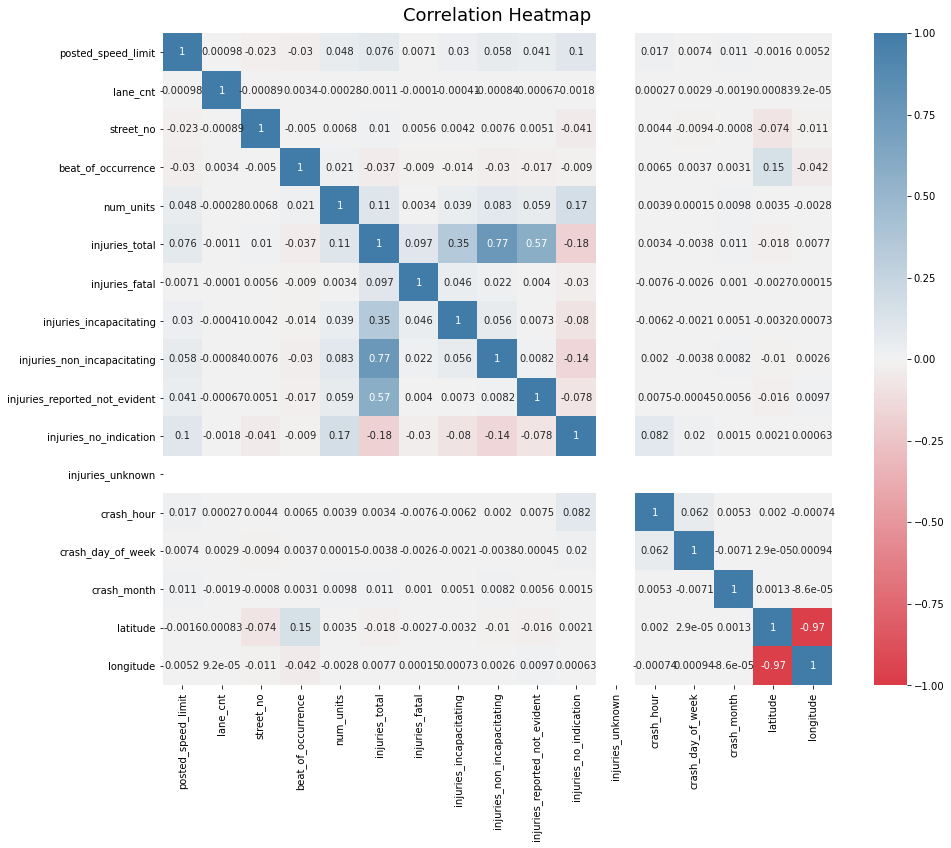

In [7]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(df_crashes.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [8]:
df_1_fatal = df_crashes[df_crashes['injuries_fatal'] >= 1]
df_1_fatal

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
31,09eba71804d41a145cbf5423f5a6a99fe8e8e08d4f4757...,JD292201,NaN,07/10/2020 02:55:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,FOUR WAY,NaN,STRAIGHT AND LEVEL,WET,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,Y,"OVER $1,500",07/10/2020 02:55:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,501,S,SACRAMENTO BLVD,1135.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,6,7,NaN,NaN,NaN
674,fdc5d4d1299102e75fd8c7997ea5c343a0b5e62a4f7bde...,JD168667,Y,02/29/2020 12:35:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"$501 - $1,500",02/29/2020 12:39:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,3730,W,LAKE ST,1122.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,7,2,41.885242,-87.719702,POINT (-87.719701637005 41.885242209045)
1229,0b5c9ae3e936fd93a9c9dab85e638c0cb848a586a18551...,JD293557,NaN,07/11/2020 06:41:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,HEAD ON,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",07/11/2020 06:53:00 AM,IMPROPER LANE USAGE,UNABLE TO DETERMINE,2558,W,PETERSON AVE,2413.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,4.0,1.0,1.0,2.0,0.0,0.0,0.0,6,7,7,41.990581,-87.694474,POINT (-87.694474132951 41.990580936971)
2816,f4e1f0e49f5235e4d309257a1e506aed15ea89c1df66ca...,JC435500,NaN,09/16/2019 11:11:00 AM,45,UNKNOWN,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,NaN,"CURVE, LEVEL",DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,NaN,"OVER $1,500",09/16/2019 11:11:00 AM,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,UNABLE TO DETERMINE,8600,S,CHICAGO SKYWAY OB,412.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,FATAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11,2,9,NaN,NaN,NaN
3263,4f74423f38a9e168e7034e444a9145b813f4bc06ec8b81...,JA493953,Y,11/01/2017 02:15:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,DIVIDED - W/MEDIAN BARRIER,3.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",11/01/2017 02:25:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,8300,S,STONY ISLAND AVE,412.0,Y,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,4,11,41.744152,-87.585945,POINT (-87.585945066953 41.744151639042)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535434,fd348eebbdb21cb171cc2a1a6c9c216568312dccab64a8...,JD450895,NaN,12/05/2020 11:48:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",12/05/2020 11:58:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,7401,S,CICERO AVE,833.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,FATAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,23,7,12,41.758728,-87.741536,POINT (-87.741535662317 41.75872799769)
535637,fd4e962185d0aa49510488709abd0c39b40cf664c1b81a...,JC487730,NaN,10/26/2019 10:

In [9]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107267 entries, 0 to 1107266
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   crash_unit_id             1107267 non-null  int64  
 1   crash_record_id           1107267 non-null  object 
 2   rd_no                     1097786 non-null  object 
 3   crash_date                1107267 non-null  object 
 4   unit_no                   1107267 non-null  int64  
 5   unit_type                 1105670 non-null  object 
 6   num_passengers            165920 non-null   float64
 7   vehicle_id                1081934 non-null  float64
 8   cmrc_veh_i                20475 non-null    object 
 9   make                      1081929 non-null  object 
 10  model                     1081786 non-null  object 
 11  lic_plate_state           987487 non-null   object 
 12  vehicle_year              905696 non-null   float64
 13  vehicle_defect            1

In [10]:
df_cars['hazmat_present_i']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1107262    NaN
1107263    NaN
1107264    NaN
1107265    NaN
1107266    NaN
Name: hazmat_present_i, Length: 1107267, dtype: object

In [11]:
df_ppl['cell_phone_use'].value_counts()

Y    752
N    405
Name: cell_phone_use, dtype: int64

In [12]:
df_ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195747 entries, 0 to 1195746
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   person_id              1195747 non-null  object 
 1   person_type            1195747 non-null  object 
 2   crash_record_id        1195747 non-null  object 
 3   rd_no                  1185613 non-null  object 
 4   vehicle_id             1172146 non-null  float64
 5   crash_date             1195747 non-null  object 
 6   seat_no                244512 non-null   float64
 7   city                   879728 non-null   object 
 8   state                  890189 non-null   object 
 9   zipcode                803192 non-null   object 
 10  sex                    1177665 non-null  object 
 11  age                    852450 non-null   float64
 12  drivers_license_state  705542 non-null   object 
 13  drivers_license_class  608027 non-null   object 
 14  safety_equipment  

In [13]:
df_not_severe = df_ppl[(df_ppl['injury_classification'] != "INCAPACITATING INJURY") & (df_ppl['injury_classification'] != "FATAL")]
df_not_severe

,person_id,person_type,crash_record_id,rd_no,vehicle_id,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195742,P262501,PASSENGER,d58220ff7bbf4e737d730089644922dbbcb7f65dc51a3a...,JE351711,1110345.0,08/27/2021 11:30:00 AM,3.0,CHICAGO,IL,NaN,F,19.0,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,ST ANTHONY,CFD,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195743,P262505,PASSENGER,73e7f48d3c39971c8daac2f1f984ed9bfd38f3d6745062...,JE351737,1110355.0,08/27/2021 11:48:00 AM,6.0,CHICAGO,IL,60634,F,3.0,NaN,NaN,CHILD RESTRAINT - FORWARD FACING,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,REFUSED,CHICAGO FIRE DEPARTMENT,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195744,P262506,PASSENGER,d6123724b7936d8903f7ca872a90935188dd135eb7420c...,JE351703,1110368.0,08/27/2021 10:35:00 AM,3.0,NaN,IL,NaN,M,0.0,NaN,NaN,CHILD RESTRAINT - TYPE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,HUMBOLDT PARK HEALTH,CFD,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195745,P262507,PASSENGER,750d2e837d1185b449239611720ac32969174f1934f9ea...,JE351752,1110378.0,08/27/2021 11:31:00 AM,3.0,CHICAGO,IL,60629,F,40.0,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_severe = df_ppl[(df_ppl['injury_classification'] == "INCAPACITATING INJURY") | (df_ppl['injury_classification'] == "FATAL")]
df_severe

,person_id,person_type,crash_record_id,rd_no,vehicle_id,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
102,P193979,PASSENGER,883894fdf3e34b8da6aec050ca860213fc5f6657714684...,JD161663,804986.0,02/23/2020 12:40:00 AM,4.0,CHICAGO,IL,60649,M,27.0,NaN,NaN,SAFETY BELT NOT USED,DID NOT DEPLOY,NONE,INCAPACITATING INJURY,NORTH WESTERN HOSPITAL,CFD AMB 43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,O880468,DRIVER,b25489278fb5b3ff0c61c1cdfd93028308c8879639caa6...,JD226210,835319.0,05/07/2020 05:21:00 AM,NaN,CHICAGO,IL,60630,M,39.0,IL,BM,DOT COMPLIANT MOTORCYCLE HELMET,NOT APPLICABLE,NONE,INCAPACITATING INJURY,STROGER,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
172,O837935,DRIVER,a8405fd5fb5ec1a8b80143f139e248d72c9bb630278936...,JD144213,795192.0,02/08/2020 03:02:00 AM,NaN,SKOKIE,IL,60076,M,62.0,IL,D,NONE PRESENT,DID NOT DEPLOY,NONE,INCAPACITATING INJURY,ST.FRANSIC,56,NaN,NONE,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
308,O838234,PEDESTRIAN,d14abcac0d5211556093b27f866291121caa2f50c6b71b...,JD144622,NaN,02/08/2020 01:25:00 PM,NaN,CHICAGO,IL,NaN,M,28.0,NaN,NaN,NaN,NaN,NaN,INCAPACITATING INJURY,COMER CHILDREN'S HOSPITAL,CFD,NaN,NONE,UNKNOWN,UNKNOWN,CROSSING - NO CONTROLS (NOT AT INTERSECTION),NO CONTRASTING CLOTHING,UNKNOWN/NA,TEST NOT OFFERED,NaN,NaN
504,O838563,DRIVER,362c12430744ace0e1bd90e95689790166481ef62c096f...,JD145123,795783.0,02/08/2020 09:47:00 PM,NaN,CHICAGO,IL,60639,F,40.0,IL,NaN,USAGE UNKNOWN,"DEPLOYED, COMBINATION",UNKNOWN,FATAL,MT. SINAI,CFD,NaN,NONE,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195495,O1170843,DRIVER,04eccb444de65cd5ffaa3cf12be785ddc661d99b3ca977...,JE352203,1110664.0,08/27/2021 05:29:00 PM,NaN,CHICAGO,IL,60639,M,61.0,IL,D,NONE PRESENT,DID NOT DEPLOY,NONE,INCAPACITATING INJURY,MOUNT SINAI,77,NaN,TOO FAST FOR CONDITIONS,NOT OBSCURED,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1195500,O1170857,PEDESTRIAN,92eb3a17ae91b3ab890b964edf259e7cb1dba8c33434aa...,JE352214,NaN,08/27/2021 05:40:00 PM,NaN,CHICAGO,IL,60615,M,79.0,NaN,NaN,USAGE UNKNOWN,NaN,NaN,INCAPACITATING INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
1195532,O1170903,DRIVER,cd13862641b9c19267c797907a00b49dd4b8903c1fd96e...,JE352330,1110759.0,08/27/2021 07:24:00 PM,NaN,CHICAGO,IL,60619,M,NaN,IL,D,DOT COMPLIANT MOTORCYCLE HELMET,NOT APPLICABLE,UNKNOWN,INCAPACITATING INJURY,UNIVERSITY OF CHICAGO,50,NaN,NONE,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1195630,O1171055,DRIVER,f948c4dfa4d036cd3a45c54bc2187b5106da7e40954f06...,JE352633,1110885.0,08/27/2021 10:05:00 PM,NaN,CHICAGO,IL,60624,M,19.0,IL,NaN,USAGE UNKNOWN,"DEPLOYED, COMBINATION",UNKNOWN,INCAPACITATING INJURY,MT. SINAI,CFD AMB 34,NaN,OTHER,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [15]:
df_ppl

,person_id,person_type,crash_record_id,rd_no,vehicle_id,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195742,P262501,PASSENGER,d58220ff7bbf4e737d730089644922dbbcb7f65dc51a3a...,JE351711,1110345.0,08/27/2021 11:30:00 AM,3.0,CHICAGO,IL,NaN,F,19.0,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,ST ANTHONY,CFD,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195743,P262505,PASSENGER,73e7f48d3c39971c8daac2f1f984ed9bfd38f3d6745062...,JE351737,1110355.0,08/27/2021 11:48:00 AM,6.0,CHICAGO,IL,60634,F,3.0,NaN,NaN,CHILD RESTRAINT - FORWARD FACING,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,REFUSED,CHICAGO FIRE DEPARTMENT,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195744,P262506,PASSENGER,d6123724b7936d8903f7ca872a90935188dd135eb7420c...,JE351703,1110368.0,08/27/2021 10:35:00 AM,3.0,NaN,IL,NaN,M,0.0,NaN,NaN,CHILD RESTRAINT - TYPE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,HUMBOLDT PARK HEALTH,CFD,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195745,P262507,PASSENGER,750d2e837d1185b449239611720ac32969174f1934f9ea...,JE351752,1110378.0,08/27/2021 11:31:00 AM,3.0,CHICAGO,IL,60629,F,40.0,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_crashes['injury'] = df_crashes['injuries_total'] >=1
df_crashes['injury']= df_crashes['injury'].astype(int)

In [6]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                541142 non-null  object 
 1   rd_no                          536550 non-null  object 
 2   crash_date_est_i               41029 non-null   object 
 3   crash_date                     541142 non-null  object 
 4   posted_speed_limit             541142 non-null  int64  
 5   traffic_control_device         541142 non-null  object 
 6   device_condition               541142 non-null  object 
 7   weather_condition              541142 non-null  object 
 8   lighting_condition             541142 non-null  object 
 9   first_crash_type               541142 non-null  object 
 10  trafficway_type                541142 non-null  object 
 11  lane_cnt                       198968 non-null  float64
 12  alignment                     

In [18]:
df_crashes['workers_present_i'].value_counts()

Y    754
N     89
Name: workers_present_i, dtype: int64

In [7]:
df_crashes[['street_direction', 'street_name']] = df_crashes[['street_direction', 'street_name']].astype(str)
df_crashes['street']= df_crashes['street_direction'] + ' ' + df_crashes['street_name']

In [8]:
df_crashes['crash_year'] = pd.DatetimeIndex(df_crashes['crash_date']).year

In [9]:
newdf = df_ppl[(df_ppl.person_type == "DRIVER")]

In [10]:
m1 = pd.merge(df_cars, newdf, how='left', on=['crash_record_id'])
m1

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,YARIS,IL,2010.0,NONE,UNKNOWN/NA,PERSONAL,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),SIERRA,IL,2008.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,N,PARKED,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,ROOF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,ENCORE,IL,NaN,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Na

In [14]:
m2 = pd.merge(m1, df_crashes, how='left', on=['crash_record_id'])
m2

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,injury,street,crash_year
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),0,S CALIFORNIA BLVD,2020
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AW

In [15]:
df = m2.drop_duplicates(subset=['crash_record_id'], keep='first')
df

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,injury,street,crash_year
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),0,S CALIFORNIA BLVD,2020
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AW

In [ ]:
df['injuries_fatal'].value_counts()

In [ ]:
df['fatality'] = df['injuries_fatal'] >=1
df['fatality'] = df['fatality'].astype(int)

In [ ]:
df['fatality'].value_counts()

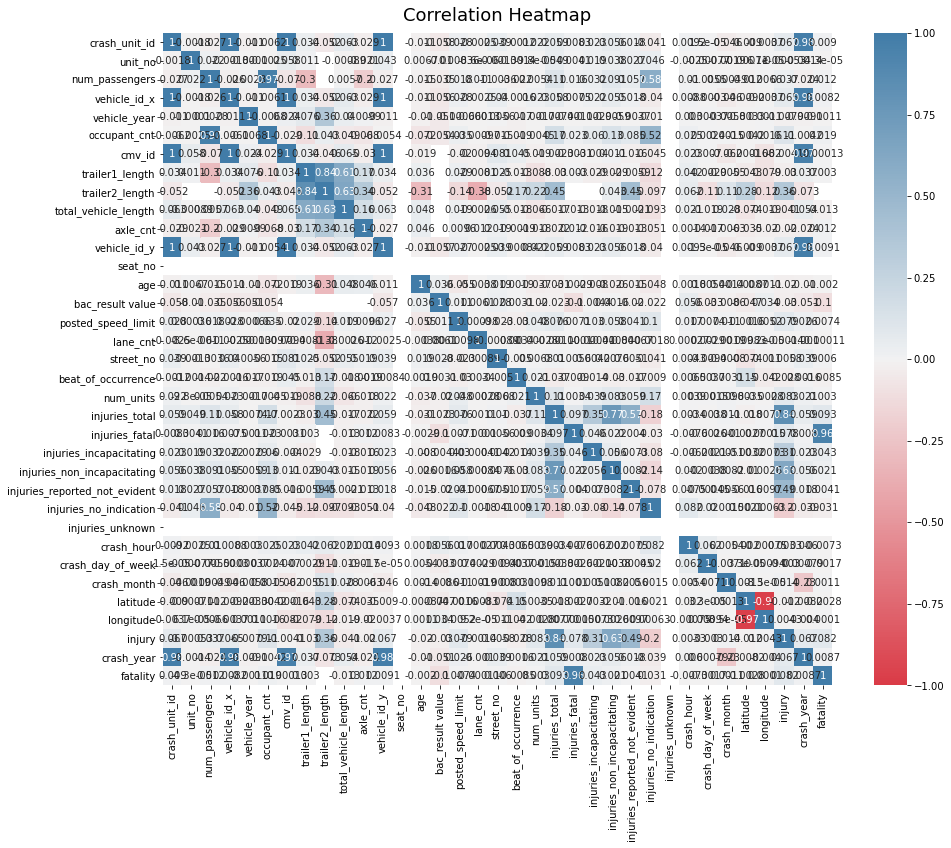

In [28]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [29]:
df['occupant_cnt']

0          1.0
1          1.0
4          1.0
6          0.0
7          1.0
          ... 
1960898    1.0
1960902    1.0
1960906    1.0
1960926    1.0
1960927    1.0
Name: occupant_cnt, Length: 541133, dtype: float64

In [30]:
df

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,injury,street,crash_year,fatality
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),0,S CALIFORNIA BLVD,2020,0
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY

In [31]:
df['first_crash_type'].value_counts()

REAR END                        127020
PARKED MOTOR VEHICLE            125965
SIDESWIPE SAME DIRECTION         82738
TURNING                          75594
ANGLE                            57514
FIXED OBJECT                     25144
PEDESTRIAN                       12317
PEDALCYCLIST                      7993
SIDESWIPE OPPOSITE DIRECTION      7903
OTHER OBJECT                      5198
HEAD ON                           4666
REAR TO FRONT                     3593
REAR TO SIDE                      2197
OTHER NONCOLLISION                1750
REAR TO REAR                       808
ANIMAL                             377
OVERTURNED                         323
TRAIN                               33
Name: first_crash_type, dtype: int64

In [17]:
columns = ['crash_record_id', 'crash_date_x', 'latitude', 'longitude', 'injury', 'crash_month', 'crash_hour', 
           'street_name', 'damage', 'hit_and_run_i', 'roadway_surface_cond', 'road_defect',
          'weather_condition', 'crash_day_of_week', 'driver_action', 'exceed_speed_limit_i',
          'prim_contributory_cause', 'first_crash_type'] 

In [18]:
df1 = df[columns]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541133 entries, 0 to 1960927
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_record_id          541133 non-null  object 
 1   crash_date_x             541133 non-null  object 
 2   latitude                 538017 non-null  float64
 3   longitude                538017 non-null  float64
 4   injury                   541133 non-null  int64  
 5   crash_month              541133 non-null  int64  
 6   crash_hour               541133 non-null  int64  
 7   street_name              541133 non-null  object 
 8   damage                   541133 non-null  object 
 9   hit_and_run_i            162936 non-null  object 
 10  roadway_surface_cond     541133 non-null  object 
 11  road_defect              541133 non-null  object 
 12  weather_condition        541133 non-null  object 
 13  crash_day_of_week        541133 non-null  int64  
 14  dri

In [178]:
df1

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,41.860250,-87.695575,0,1,0,6,CALIFORNIA BLVD,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,4,NONE,NaN,UNABLE TO DETERMINE
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,41.900043,-87.755577,0,9,0,3,LARAMIE AVE,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,7,UNKNOWN,NaN,UNABLE TO DETERMINE
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,41.736044,-87.653404,0,4,0,22,87TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,2,NONE,NaN,IMPROPER OVERTAKING/PASSING
6,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,41.999816,-87.663273,0,9,0,8,LAKEWOOD AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,UNKNOWN,1,UNKNOWN,NaN,UNABLE TO DETERMINE
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,0,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960898,7c634a3d328d1c64c1fdef00de6c7c43986ebc72a6b6eb...,08/27/2021 03:00:00 PM,41.894324,-87.615120,0,8,0,15,LAKE SHORE DR NB,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,6,FAILED TO YIELD,NaN,FAILING TO YIELD RIGHT-OF-WAY
1960902,73f9ba74d84daea560594953f7732d2d88d14fcca39315...,08/27/2021 11:30:00 PM,41.931741,-87.722146,0,8,0,23,DIVERSEY AVE,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,NOT APPLICABLE
1960906,7bc56cd28d1f86dc1788787e71f54628404ff5b53c193e...,08/27/2021 03:45:00 PM,41.885782,-87.647022,0,8,0,15,LAKE ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE
1960926,3469769654612e4e4d2f6685b25c85d1d7b27e83ba0ddd...,08/27/2021 08:39:00 AM,41.751965,-87.557019,0,8,0,8,79TH ST,$500 OR LESS,NaN,DRY,UNKNOWN,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541133 entries, 0 to 1960927
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_record_id          541133 non-null  object 
 1   crash_date_x             541133 non-null  object 
 2   latitude                 538017 non-null  float64
 3   longitude                538017 non-null  float64
 4   injury                   541133 non-null  int64  
 5   crash_month              541133 non-null  int64  
 6   fatality                 541133 non-null  int64  
 7   crash_hour               541133 non-null  int64  
 8   street_name              541133 non-null  object 
 9   damage                   541133 non-null  object 
 10  hit_and_run_i            162936 non-null  object 
 11  roadway_surface_cond     541133 non-null  object 
 12  road_defect              541133 non-null  object 
 13  weather_condition        541133 non-null  object 
 14  cra

In [125]:
df1['prim_contributory_cause'].value_counts()

UNABLE TO DETERMINE                                                                 202535
FAILING TO YIELD RIGHT-OF-WAY                                                        59071
FOLLOWING TOO CLOSELY                                                                56183
NOT APPLICABLE                                                                       29030
IMPROPER OVERTAKING/PASSING                                                          25754
FAILING TO REDUCE SPEED TO AVOID CRASH                                               23418
IMPROPER BACKING                                                                     23249
IMPROPER LANE USAGE                                                                  20576
IMPROPER TURNING/NO SIGNAL                                                           17895
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  17175
DISREGARDING TRAFFIC SIGNALS                                                         10095

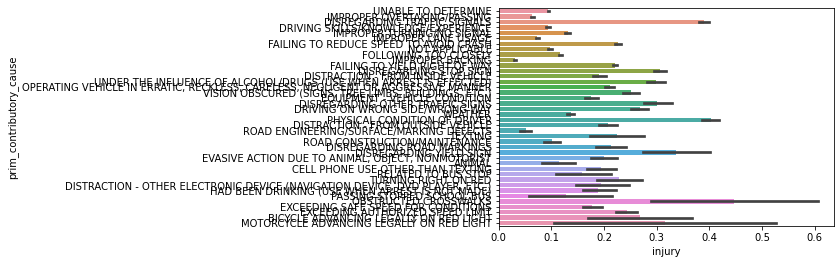

In [141]:
ax = sns.barplot(x="injury", y="prim_contributory_cause", data=df1)


<AxesSubplot:xlabel='injury', ylabel='prim_contributory_cause'>

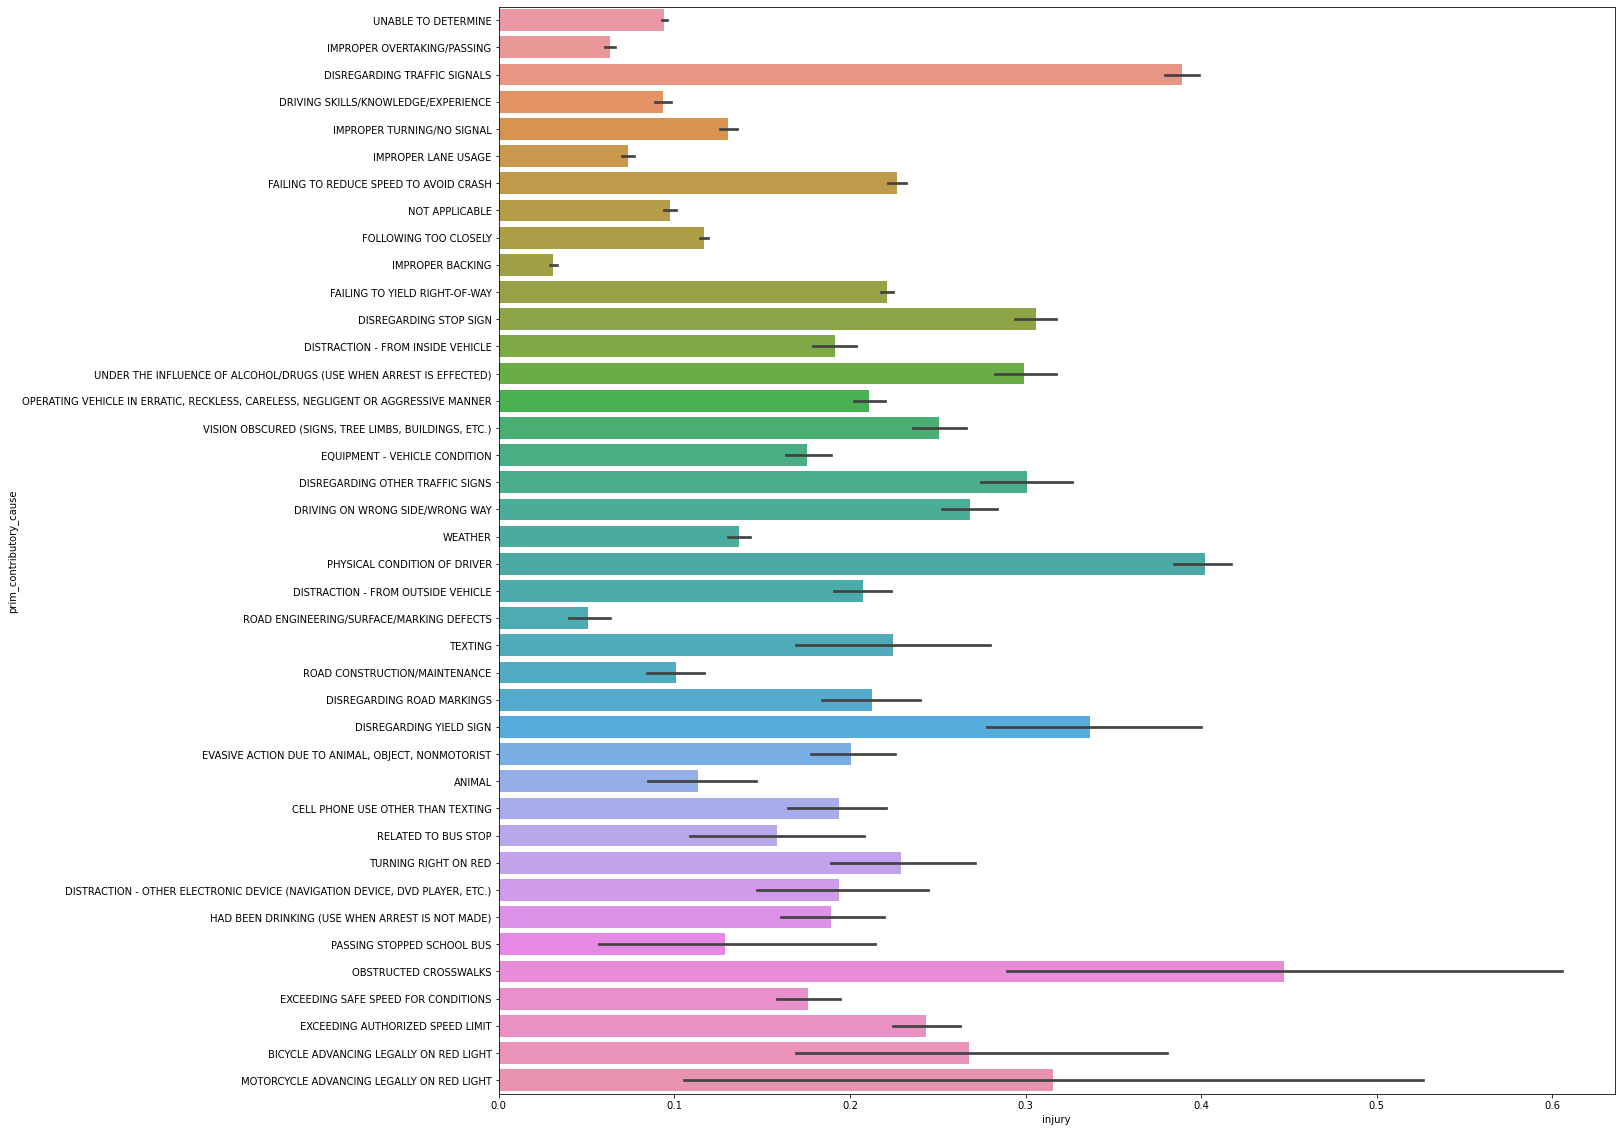

In [146]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "injury", y = "prim_contributory_cause", ax=ax, data=df)

In [212]:
df_weather = df_injuries.loc[df_injuries['prim_contributory_cause'] == 'WEATHER']
df_weather

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause
3255,0b1ce91631d51773324a2b44320143f9ae12a1fdddbc9d...,02/13/2020 08:30:00 AM,41.997356,-87.802986,1,2,0,8,DEVON AVE,"OVER $1,500",NaN,SNOW OR SLUSH,NO DEFECTS,SNOW,5,OTHER,NaN,WEATHER
4970,12579080a1c57608ec074f2e3cadf204d8ddda4de3998d...,02/13/2020 08:20:00 AM,41.790942,-87.620897,1,2,0,8,INDIANA AVE,$500 OR LESS,NaN,SNOW OR SLUSH,NO DEFECTS,SNOW,5,UNKNOWN,NaN,WEATHER
6110,b525afe8405ef37c55184790c5c440917aa3970d8b749e...,07/10/2020 09:23:00 AM,41.722387,-87.584984,1,7,0,9,STONY ISLAND AVE,"OVER $1,500",NaN,WET,NO DEFECTS,RAIN,6,OTHER,NaN,WEATHER
6534,8c6120d37a26b3107fcb2c17fc7947db66b5ff94ca893f...,01/30/2020 08:50:00 AM,41.986797,-87.674754,1,1,0,8,RAVENSWOOD AVE,"OVER $1,500",NaN,ICE,NO DEFECTS,CLEAR,5,TOO FAST FOR CONDITIONS,NaN,WEATHER
8874,3949a39a68e3a2a31d6ec2d826dcac16777007fbcfb166...,01/31/2020 08:05:00 AM,41.859223,-87.627091,1,1,0,8,STATE ST,"OVER $1,500",NaN,WET,NO DEFECTS,SNOW,6,NONE,NaN,WEATHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948244,d70fe6cb6650d82915c3055ec5cfe0cb8e9384da382644...,08/21/2021 03:55:00 PM,41.857557,-87.638874,1,8,0,15,18TH ST,"OVER $1,500",NaN,WET,UNKNOWN,CLEAR,7,OTHER,NaN,WEATHER
1953953,1f32ffafb82bf43742562b8939c82e204dcfcae4bb15fb...,08/24/2021 08:35:00 PM,41.760437,-87.557212,1,8,0,20,SOUTH SHORE DR,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,3,UNKNOWN,NaN,WEATHER
1953955,5fa36699687ea50b581895cb49ebad0703fc7781eceb30...,08/24/2021 05:05:00 PM,41.903834,-87.628584,1,8,0,17,DIVISION ST,$500 OR LESS,NaN,WET,NO DEFECTS,RAIN,3,FAILED TO YIELD,NaN,WEATHER
1953976,d9226042cdf3572295fcd0dc1833a863fda6df8c5e79c4...,08/24/2021 05:48:00 PM,41.968417,-87.699498,1,8,0,17,LAWRENCE AVE,"OVER $1,500",NaN,WET,NO DEFECTS,RAIN,3,NONE,NaN,WEATHER


In [182]:
df_imp = df[columns]

In [183]:
df1 = df_imp

In [184]:
df_injuries = df_imp.loc[df_imp['injury'] == 1]

In [188]:
df_injuries

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,0,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS
13,55a20437d79a3176ac805c65b13940186970246ab14ce5...,02/07/2020 01:19:00 PM,41.748003,-87.566318,1,2,0,13,YATES BLVD,$500 OR LESS,NaN,WET,NO DEFECTS,CLEAR,6,FAILED TO YIELD,NaN,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE
25,983284fd6cb4a9ca96b05543a77306302da59c4a6ff1b8...,02/09/2020 04:32:00 PM,41.879418,-87.636521,1,2,0,16,LOWER WACKER DR,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,1,FAILED TO YIELD,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH
58,034f42deaec11021e28cda25717373e36351025652ccf1...,09/09/2018 12:25:00 PM,41.737376,-87.643781,1,9,0,12,VINCENNES AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,1,UNKNOWN,NaN,UNABLE TO DETERMINE
64,ed571d6d3be6511047bea9305a81182fd7b99afbb0abc6...,07/06/2020 03:57:00 PM,NaN,NaN,1,7,0,15,71ST ST,"OVER $1,500",NaN,DRY,UNKNOWN,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960657,f2db0d7a7c6b02dba7f82bc010d391398f75cb9bc375bb...,08/27/2021 11:35:00 PM,41.848160,-87.732672,1,8,0,23,OGDEN AVE,"OVER $1,500",Y,DRY,UNKNOWN,CLEAR,6,UNKNOWN,NaN,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE..."
1960673,c7371836db500f7f5882d42bbbcdbee1b5287ca439a14b...,08/27/2021 08:30:00 PM,41.945133,-87.825511,1,8,0,20,FOREST PRESERVE AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,CLEAR,6,OTHER,NaN,UNABLE TO DETERMINE
1960733,b64e2ee82ae761ffdfc922529cba00e9e32a51acd69f17...,08/27/2021 01:10:00 PM,41.904589,-87.640496,1,8,0,13,CLYBOURN AVE,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,FAILING TO YIELD RIGHT-OF-WAY
1960752,734d77c5854d1c1b4e0bcebeb3990b7592de64aa748ef7...,08/27/2021 06:00:00 PM,41.904066,-87.640191,1,8,0,18,CLYBOURN AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH


In [25]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 19)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df1['rush_hour'] = (df1['crash_hour'].apply(rush_hour) & df1['crash_day_of_week'].apply(rush_hour_day))

<ipython-input-25-b1186476fb47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rush_hour'] = (df1['crash_hour'].apply(rush_hour) & df1['crash_day_of_week'].apply(rush_hour_day))


In [206]:
weekday_rush_hour_df = df_injuries[((df_injuries['crash_hour'] >= 7) & (df_injuries['crash_hour'] <= 9) | (df_injuries['crash_hour'] >= 15) & (df_injuries['crash_hour'] <= 19)) & ((df_injuries['crash_day_of_week'] >= 2) & (df_injuries['crash_day_of_week'] <= 6))]
weekday_rush_hour_df

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,0,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS
64,ed571d6d3be6511047bea9305a81182fd7b99afbb0abc6...,07/06/2020 03:57:00 PM,NaN,NaN,1,7,0,15,71ST ST,"OVER $1,500",NaN,DRY,UNKNOWN,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS
122,11f75e6c7483ab30f509ce337cf97dca293b9b9cea196f...,02/11/2020 07:30:00 AM,41.894822,-87.725919,1,2,0,7,PULASKI RD,$500 OR LESS,NaN,DRY,NO DEFECTS,CLEAR,3,NONE,NaN,NOT APPLICABLE
138,5d7f2a23b62b115dedc20e86b4310503da7d6a744aeae0...,02/05/2020 06:25:00 PM,41.883091,-87.636646,1,2,0,18,WACKER DR,$500 OR LESS,NaN,SNOW OR SLUSH,NO DEFECTS,SLEET/HAIL,4,UNKNOWN,NaN,UNABLE TO DETERMINE
182,cde2567ba445603c10c705b7bd3a2968aeaac23dd7d7fb...,02/11/2020 09:02:00 AM,41.903668,-87.653699,1,2,0,9,DIVISION ST,$500 OR LESS,NaN,DRY,NO DEFECTS,CLEAR,3,OTHER,NaN,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960477,cd13862641b9c19267c797907a00b49dd4b8903c1fd96e...,08/27/2021 07:24:00 PM,41.804037,-87.616157,1,8,0,19,50TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,6,NONE,NaN,FAILING TO YIELD RIGHT-OF-WAY
1960527,38b7b71086e728f0166424c672077e4abe3527f68ecb51...,08/27/2021 07:22:00 PM,41.681405,-87.642175,1,8,0,19,HALSTED ST,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,FAILING TO YIELD RIGHT-OF-WAY
1960533,a50e5cdd70edb8b9faa65b1efcda9e77236ab755ddd69c...,08/27/2021 06:00:00 PM,41.788207,-87.684026,1,8,0,18,WESTERN AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,FOLLOWED TOO CLOSELY,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH
1960752,734d77c5854d1c1b4e0bcebeb3990b7592de64aa748ef7...,08/27/2021 06:00:00 PM,41.904066,-87.640191,1,8,0,18,CLYBOURN AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH


In [19]:
cause_dict = {'FAILING TO YIELD RIGHT-OF-WAY': 'Breaking Rules of Road',
              'IMPROPER LANE USAGE': 'Breaking Rules of Road',
             'DISREGARDING TRAFFIC SIGNALS' : 'Breaking Rules of Road',
             'IMPROPER TURNING/NO SIGNAL': 'Breaking Rules of Road',
              'DISREGARDING STOP SIGN' : 'Breaking Rules of Road',
             'DISREGARDING OTHER TRAFFIC SIGNS': 'Breaking Rules of Road',
             'DISREGARDING ROAD MARKINGS': 'Breaking Rules of Road',
             'DISREGARDING YIELD SIGN': 'Breaking Rules of Road',
             'PASSING STOPPED SCHOOL BUS': 'Breaking Rules of Road',
             'TURNING RIGHT ON RED': 'Breaking Rules of Road',
              'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speed Related',
              'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speed Related',
              'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speed Related',
              'FOLLOWING TOO CLOSELY': 'Reckless/Poor Driving',
              'IMPROPER OVERTAKING/PASSING': 'Reckless/Poor Driving',
              'IMPROPER BACKING': 'Reckless/Poor Driving',
              'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Reckless/Poor Driving',
              'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless/Poor Driving',
              'DRIVING ON WRONG SIDE/WRONG WAY': 'Reckless/Poor Driving',
              'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Drug/Alcohol Related',
              'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Drug/Alcohol Related',
              'PHYSICAL CONDITION OF DRIVER': 'Reckless/Poor Driving',
              'DISTRACTION - FROM INSIDE VEHICLE':'Distracted Driving',
              'CELL PHONE USE OTHER THAN TEXTING':'Distracted Driving',
              'TEXTING':'Distracted Driving',
              'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'Distracted Driving',
              'WEATHER':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION':"Outside World/Out of Driver's Control",
              'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':"Outside World/Out of Driver's Control",
              'DISTRACTION - FROM OUTSIDE VEHICLE':"Outside World/Out of Driver's Control",
              'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':"Outside World/Out of Driver's Control",
              'ROAD CONSTRUCTION/MAINTENANCE':"Outside World/Out of Driver's Control",
              'ANIMAL':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION': "Outside World/Out of Driver's Control",
              'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':"Outside World/Out of Driver's Control",
              'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'UNABLE TO DETERMINE': 'Other/Unknown',
              'NOT APPLICABLE': 'Other/Unknown',
              'OBSTRUCTED CROSSWALKS': 'Other/Unknown',
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown',
              'RELATED TO BUS STOP': 'Other/Unknown',
             'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown'}

In [20]:
df1['Simple_Reason'] = df1['prim_contributory_cause'].map(cause_dict)


<ipython-input-20-935cda9ff85c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Simple_Reason'] = df1['prim_contributory_cause'].map(cause_dict)


In [ ]:
exceed_speed_limit_i

In [27]:
df2 = pd.get_dummies(df1,columns=['Simple_Reason'])

In [26]:
df1

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,first_crash_type,Simple_Reason,rush_hour
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,41.860250,-87.695575,0,1,6,CALIFORNIA BLVD,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,4,NONE,NaN,UNABLE TO DETERMINE,OTHER NONCOLLISION,Other/Unknown,0
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,41.900043,-87.755577,0,9,3,LARAMIE AVE,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,7,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,Other/Unknown,0
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,41.736044,-87.653404,0,4,22,87TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,2,NONE,NaN,IMPROPER OVERTAKING/PASSING,SIDESWIPE SAME DIRECTION,Reckless/Poor Driving,0
6,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,41.999816,-87.663273,0,9,8,LAKEWOOD AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,UNKNOWN,1,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,Other/Unknown,0
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,ANGLE,Breaking Rules of Road,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960892,068cbdb2cdeabf6e8aeb80a0d6232ccf3e58343fd86596...,08/27/2021 11:00:00 PM,41.925774,-87.775205,0,8,23,ALTGELD ST,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,SIDESWIPE OPPOSITE DIRECTION,Other/Unknown,0
1960896,0a9142cc8636fc80cac7037ad58a5ec25ef1653b421b2f...,08/27/2021 09:00:00 AM,41.871698,-87.627484,0,8,9,8TH ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,Other/Unknown,1
1960910,7bc56cd28d1f86dc1788787e71f54628404ff5b53c193e...,08/27/2021 03:45:00 PM,41.885782,-87.647022,0,8,15,LAKE ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANGLE,Other/Unknown,1
1960926,3469769654612e4e4d2f6685b25c85d1d7b27e83ba0ddd...,08/27/2021 08:39:00 AM,41.751965,-87.557019,0,8,8,79TH ST,$500 OR LESS,NaN,DRY,UNKNOWN,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANIMAL,Other/Unknown,1


In [28]:
df2

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,first_crash_type,rush_hour,Simple_Reason_Breaking Rules of Road,Simple_Reason_Distracted Driving,Simple_Reason_Drug/Alcohol Related,Simple_Reason_Other/Unknown,Simple_Reason_Outside World/Out of Driver's Control,Simple_Reason_Reckless/Poor Driving,Simple_Reason_Speed Related
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,41.860250,-87.695575,0,1,6,CALIFORNIA BLVD,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,4,NONE,NaN,UNABLE TO DETERMINE,OTHER NONCOLLISION,0,0,0,0,1,0,0,0
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,41.900043,-87.755577,0,9,3,LARAMIE AVE,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,7,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,0,0,0,0,1,0,0,0
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,41.736044,-87.653404,0,4,22,87TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,2,NONE,NaN,IMPROPER OVERTAKING/PASSING,SIDESWIPE SAME DIRECTION,0,0,0,0,0,0,1,0
6,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,41.999816,-87.663273,0,9,8,LAKEWOOD AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,UNKNOWN,1,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,0,0,0,0,1,0,0,0
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,ANGLE,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960892,068cbdb2cdeabf6e8aeb80a0d6232ccf3e58343fd86596...,08/27/2021 11:00:00 PM,41.925774,-87.775205,0,8,23,ALTGELD ST,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,SIDESWIPE OPPOSITE DIRECTION,0,0,0,0,1,0,0,0
1960896,0a9142cc8636fc80cac7037ad58a5ec25ef1653b421b2f...,08/27/2021 09:00:00 AM,41.871698,-87.627484,0,8,9,8TH ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,1,0,0,0,1,0,0,0
1960910,7bc56cd28d1f86dc1788787e71f54628404ff5b53c193e...,08/27/2021 03:45:00 PM,41.885782,-87.647022,0,8,15,LAKE ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANGLE,1,0,0,0,1,0,0,0
1960926,3469769654612e4e4d2f6685b25c85d1d7b27e83ba0ddd...,08/27/2021 08:39:00 AM,41.751965,-87.557019,0,8,8,79TH ST,$500 OR LESS,NaN,DRY,UNKNOWN,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANIMAL,1,0,0,0,1,0,0,0


In [29]:
df2['first_crash_type'].value_counts()

REAR END                        127020
PARKED MOTOR VEHICLE            125965
SIDESWIPE SAME DIRECTION         82738
TURNING                          75594
ANGLE                            57514
FIXED OBJECT                     25144
PEDESTRIAN                       12317
PEDALCYCLIST                      7993
SIDESWIPE OPPOSITE DIRECTION      7903
OTHER OBJECT                      5198
HEAD ON                           4666
REAR TO FRONT                     3593
REAR TO SIDE                      2197
OTHER NONCOLLISION                1750
REAR TO REAR                       808
ANIMAL                             377
OVERTURNED                         323
TRAIN                               33
Name: first_crash_type, dtype: int64

In [215]:
df2['road_defect'].value_counts()

NO DEFECTS           448327
UNKNOWN               81207
RUT, HOLES             4718
OTHER                  3045
WORN SURFACE           2222
SHOULDER DEFECT        1156
DEBRIS ON ROADWAY       458
Name: road_defect, dtype: int64

In [31]:
df2 = df2.drop(labels = ['crash_record_id','crash_date_x','latitude','longitude', 'street_name',
                       'damage','exceed_speed_limit_i', 'prim_contributory_cause', 'hit_and_run_i', 'crash_hour',
                        'crash_month', 'roadway_surface_cond'], axis=1)

In [33]:
df3 = pd.get_dummies(df2,columns=['first_crash_type'])

In [35]:
df3['weather_condition'].value_counts()

CLEAR                       430457
RAIN                         46498
UNKNOWN                      23856
SNOW                         20313
CLOUDY/OVERCAST              15882
OTHER                         1660
FOG/SMOKE/HAZE                 844
SLEET/HAIL                     722
FREEZING RAIN/DRIZZLE          628
BLOWING SNOW                   166
SEVERE CROSS WIND GATE         105
BLOWING SAND, SOIL, DIRT         2
Name: weather_condition, dtype: int64

In [36]:
df4 = df3[df3.weather_condition != 'UNKNOWN']

In [38]:
df4 = df4[df4.weather_condition != 'OTHER']

In [40]:
df4 = df4.drop('crash_day_of_week', axis=1)

In [42]:
df4 = df4[df4.road_defect != 'UNKNOWN']

In [43]:
df4 = 

,injury,road_defect,weather_condition,driver_action,rush_hour,Simple_Reason_Breaking Rules of Road,Simple_Reason_Distracted Driving,Simple_Reason_Drug/Alcohol Related,Simple_Reason_Other/Unknown,Simple_Reason_Outside World/Out of Driver's Control,Simple_Reason_Reckless/Poor Driving,Simple_Reason_Speed Related,first_crash_type_ANGLE,first_crash_type_ANIMAL,first_crash_type_FIXED OBJECT,first_crash_type_HEAD ON,first_crash_type_OTHER NONCOLLISION,first_crash_type_OTHER OBJECT,first_crash_type_OVERTURNED,first_crash_type_PARKED MOTOR VEHICLE,first_crash_type_PEDALCYCLIST,first_crash_type_PEDESTRIAN,first_crash_type_REAR END,first_crash_type_REAR TO FRONT,first_crash_type_REAR TO REAR,first_crash_type_REAR TO SIDE,first_crash_type_SIDESWIPE OPPOSITE DIRECTION,first_crash_type_SIDESWIPE SAME DIRECTION,first_crash_type_TRAIN,first_crash_type_TURNING
0,0,NO DEFECTS,CLEAR,NONE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,NO DEFECTS,RAIN,UNKNOWN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,NO DEFECTS,CLEAR,NONE,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1,NO DEFECTS,CLEAR,DISREGARDED CONTROL DEVICES,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,NO DEFECTS,CLEAR,FAILED TO YIELD,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960890,1,NO DEFECTS,CLEAR,FAILED TO YIELD,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1960892,0,NO DEFECTS,CLEAR,UNKNOWN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1960896,0,NO DEFECTS,CLEAR,UNKNOWN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1960910,0,NO DEFECTS,CLEAR,UNKNOWN,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
def rd_defect(x):
    if (x == 'NO DEFECTS'):
        return 0
    else:
        return 1

df4['road_defect2'] = (df4['road_defect'].apply(rd_defect))

<ipython-input-45-6e73bfb8944c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['road_defect2'] = (df4['road_defect'].apply(rd_defect))


In [46]:
df4[]

,injury,road_defect,weather_condition,driver_action,rush_hour,Simple_Reason_Breaking Rules of Road,Simple_Reason_Distracted Driving,Simple_Reason_Drug/Alcohol Related,Simple_Reason_Other/Unknown,Simple_Reason_Outside World/Out of Driver's Control,Simple_Reason_Reckless/Poor Driving,Simple_Reason_Speed Related,first_crash_type_ANGLE,first_crash_type_ANIMAL,first_crash_type_FIXED OBJECT,first_crash_type_HEAD ON,first_crash_type_OTHER NONCOLLISION,first_crash_type_OTHER OBJECT,first_crash_type_OVERTURNED,first_crash_type_PARKED MOTOR VEHICLE,first_crash_type_PEDALCYCLIST,first_crash_type_PEDESTRIAN,first_crash_type_REAR END,first_crash_type_REAR TO FRONT,first_crash_type_REAR TO REAR,first_crash_type_REAR TO SIDE,first_crash_type_SIDESWIPE OPPOSITE DIRECTION,first_crash_type_SIDESWIPE SAME DIRECTION,first_crash_type_TRAIN,first_crash_type_TURNING,road_defect2
0,0,NO DEFECTS,CLEAR,NONE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,NO DEFECTS,RAIN,UNKNOWN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,NO DEFECTS,CLEAR,NONE,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,1,NO DEFECTS,CLEAR,DISREGARDED CONTROL DEVICES,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,NO DEFECTS,CLEAR,FAILED TO YIELD,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960890,1,NO DEFECTS,CLEAR,FAILED TO YIELD,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1960892,0,NO DEFECTS,CLEAR,UNKNOWN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1960896,0,NO DEFECTS,CLEAR,UNKNOWN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1960910,0,NO DEFECTS,CLEAR,UNKNOWN,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
df4['weather_condition'].value_counts()

CLEAR                       379570
RAIN                         39480
SNOW                         16544
CLOUDY/OVERCAST              13438
FOG/SMOKE/HAZE                 723
SLEET/HAIL                     609
FREEZING RAIN/DRIZZLE          519
BLOWING SNOW                   129
SEVERE CROSS WIND GATE          83
BLOWING SAND, SOIL, DIRT         1
Name: weather_condition, dtype: int64

In [50]:
df4 = df4.drop('driver_action', axis=1)

In [52]:
df4 = df4.drop('road_defect', axis=1)

In [54]:
df4 = pd.get_dummies(df4,columns=['weather_condition'])

In [55]:
df4

,injury,rush_hour,Simple_Reason_Breaking Rules of Road,Simple_Reason_Distracted Driving,Simple_Reason_Drug/Alcohol Related,Simple_Reason_Other/Unknown,Simple_Reason_Outside World/Out of Driver's Control,Simple_Reason_Reckless/Poor Driving,Simple_Reason_Speed Related,first_crash_type_ANGLE,first_crash_type_ANIMAL,first_crash_type_FIXED OBJECT,first_crash_type_HEAD ON,first_crash_type_OTHER NONCOLLISION,first_crash_type_OTHER OBJECT,first_crash_type_OVERTURNED,first_crash_type_PARKED MOTOR VEHICLE,first_crash_type_PEDALCYCLIST,first_crash_type_PEDESTRIAN,first_crash_type_REAR END,first_crash_type_REAR TO FRONT,first_crash_type_REAR TO REAR,first_crash_type_REAR TO SIDE,first_crash_type_SIDESWIPE OPPOSITE DIRECTION,first_crash_type_SIDESWIPE SAME DIRECTION,first_crash_type_TRAIN,first_crash_type_TURNING,road_defect2,"weather_condition_BLOWING SAND, SOIL, DIRT",weather_condition_BLOWING SNOW,weather_condition_CLEAR,weather_condition_CLOUDY/OVERCAST,weather_condition_FOG/SMOKE/HAZE,weather_condition_FREEZING RAIN/DRIZZLE,weather_condition_RAIN,weather_condition_SEVERE CROSS WIND GATE,weather_condition_SLEET/HAIL,weather_condition_SNOW
0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960890,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1960892,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1960896,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1960910,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
X4 = df4.drop('injury', axis=1)
y4 = df4['injury']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=.25, random_state=42)

In [69]:
df4['injury'].sum()

61737

In [62]:
from imblearn.over_sampling import SMOTE 

In [63]:
# standardizing the data
scaler=StandardScaler()

X4_train=scaler.fit_transform(X4_train)
X4_test=scaler.transform(X4_test)

# hanlding the imbalance with SMOTE
smote = SMOTE()
X4_train, y4_train = smote.fit_sample(X4_train, y4_train)

In [70]:
X4_train=scaler.fit_transform(X4_train)
X4_test=scaler.transform(X4_test)

rand=RandomForestClassifier(random_state=42)

rand.fit(X4_train, y4_train.values.ravel())
y_pred = rand.predict(X4_test)

print("Accuracy:", accuracy_score(y4_test, y_pred))
print("Precision:", precision_score(y4_test, y_pred))     
print("Recall:", recall_score(y4_test, y_pred))
print("F1:", f1_score(y4_test, y_pred))
print("AUC", roc_auc_score(y4_test, y_pred))
print("CVS", cross_val_score(rand, X4_train, y4_train, scoring="neg_root_mean_squared_error").mean())

Accuracy: 0.88565626828879
Precision: 0.780326422584914
Recall: 0.2291896093800609
F1: 0.35431375494466977
AUC 0.6094785590691464
CVS -0.3385312115633864


In [67]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(random_state=42)

rand.fit(X4_train, y4_train.values.ravel())
y_pred = rand.predict(X4_test)

print("Accuracy:", accuracy_score(y4_test, y_pred))
print("Precision:", precision_score(y4_test, y_pred))     
print("Recall:", recall_score(y4_test, y_pred))
print("F1:", f1_score(y4_test, y_pred))
print("AUC", roc_auc_score(y4_test, y_pred))
print("CVS", cross_val_score(rand, X4_train, y4_train, scoring="neg_root_mean_squared_error").mean())

Accuracy: 0.7216290989057762
Precision: 0.27711348270659886
Recall: 0.6425471270324545
F1: 0.3872264839647869
AUC 0.6883590500218726
CVS -0.5532729553909947


NameError: name 'd4' is not defined

In [247]:
X= df2.drop(labels = ['injury', 'road_defect', 'weather_condition', 'crash_day_of_week', 'driver_action'], axis=1)
y= df2['injury']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [273]:
from imblearn.over_sampling import SMOTE 
# standardizing the data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

(704938,)

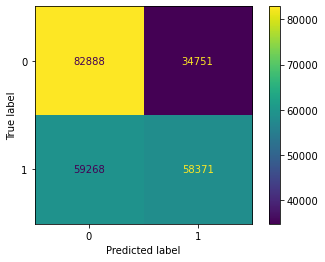

In [277]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rand, X_test, y_test)

In [276]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(random_state=42)

rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))     
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(rand, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

Accuracy: 0.6003918768435638
Precision: 0.6268228775155172
Recall: 0.49618748884298575
F1: 0.5539070321359265
AUC 0.6003918768435638
CVS -0.6343575661935115


In [194]:
from sklearn.dummy import DummyClassifier
X = df1.drop(['injury', 'fatality'], axis=1)
y = df1['injury']

In [202]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

y_pred = dummy_clf.predict(X)


print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
#print("AUC", roc_auc_score(y_test, y_pred))
#print("CVS", cross_val_score(logreg, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

Accuracy: 0.868747609182955
Precision: 0.0
Recall: 0.0
F1: 0.0


/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
df1 

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatality,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,41.860250,-87.695575,0,1,0,6,CALIFORNIA BLVD,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,4,NONE,NaN,UNABLE TO DETERMINE
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,41.900043,-87.755577,0,9,0,3,LARAMIE AVE,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,7,UNKNOWN,NaN,UNABLE TO DETERMINE
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,41.736044,-87.653404,0,4,0,22,87TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,2,NONE,NaN,IMPROPER OVERTAKING/PASSING
6,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,41.999816,-87.663273,0,9,0,8,LAKEWOOD AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,UNKNOWN,1,UNKNOWN,NaN,UNABLE TO DETERMINE
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,0,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960898,7c634a3d328d1c64c1fdef00de6c7c43986ebc72a6b6eb...,08/27/2021 03:00:00 PM,41.894324,-87.615120,0,8,0,15,LAKE SHORE DR NB,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,6,FAILED TO YIELD,NaN,FAILING TO YIELD RIGHT-OF-WAY
1960902,73f9ba74d84daea560594953f7732d2d88d14fcca39315...,08/27/2021 11:30:00 PM,41.931741,-87.722146,0,8,0,23,DIVERSEY AVE,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,NOT APPLICABLE
1960906,7bc56cd28d1f86dc1788787e71f54628404ff5b53c193e...,08/27/2021 03:45:00 PM,41.885782,-87.647022,0,8,0,15,LAKE ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE
1960926,3469769654612e4e4d2f6685b25c85d1d7b27e83ba0ddd...,08/27/2021 08:39:00 AM,41.751965,-87.557019,0,8,0,8,79TH ST,$500 OR LESS,NaN,DRY,UNKNOWN,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE


# SMOTE

In [148]:
# standardizing the data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# hanlding the imbalance with SMOTE
smote = SMOTE(k_neighbors=6)
X_train, y_train = smote.fit_sample(X_train, y_train)

# Log Regression #1 

In [159]:
logreg =LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(logreg, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Log Regression #2

In [ ]:
logreg =LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(logreg, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Log Regression #3

In [ ]:
logreg =LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(logreg, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Random Forest # 1 

In [161]:
rand=RandomForestClassifier(random_state=42)

rand.fit(X_train, y_train.values.ravel())
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(rand, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Random Forest #2

In [ ]:
rand=RandomForestClassifier(random_state=42)

rand.fit(X_train, y_train.values.ravel())
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(rand, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Random Forest #3

In [ ]:
rand=RandomForestClassifier(random_state=42)

rand.fit(X_train, y_train.values.ravel())
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(rand, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# KNN Regression #1

In [ ]:
neigh = KNeighborsRegressor()

neigh.fit(X, y)
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(neigh, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# KNN Regression #2

In [ ]:
neigh = KNeighborsRegressor()

neigh.fit(X, y)
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(neigh, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# KNN Regression #3

In [ ]:
neigh = KNeighborsRegressor()

neigh.fit(X, y)
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(neigh, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Decision Tree # 1 

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(clf, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Decision Tree # 2

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(clf, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Decision Tree # 3

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = rand.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(clf, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Gaussian Naive Bayes #1 

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(gnb, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Gaussian Naive Bayes #2

In [171]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(gnb, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# Gaussian Naive Bayes #3

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(gnb, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# XGBoost #1

In [ ]:
xgb= xgb.XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(xgb, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# XGBoost #2

In [ ]:
xgboost= xgb.XGBClassifier(random_state=42)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(xgb, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

# XGBoost #3

In [ ]:
xgboost= xgb.XGBClassifier(random_state=42)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(xgb, X_train, y_train, scoring="neg_root_mean_squared_error").mean())